# Pollution Processing

Using file download: http://iot.ee.surrey.ac.uk:8080/datasets/pollution/citypulse_pollution_csv_data_aarhus_aug_oct_2014.tar.gz

In [56]:
import tarfile
import pandas as pd
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import zipfile
from typing import List

In [59]:
file_list = []
for root, dirs, files in os.walk('../data'):
    files.sort()
    for file in files:
        if 'pollution' in file.lower() and 'tar.gz' in file.lower():  # Search for the string 'weather' (case insensitive)
            file_list.append(os.path.join(root, file))

print(file_list)

['../data/citypulse_pollution_csv_data_aarhus_aug_oct_2014.tar.gz']


In [60]:
def extract_csv_files(archive_path: str, headers: List[str]) -> pd.DataFrame:
    if archive_path.endswith(".tar.gz"):
        with tarfile.open(archive_path, "r:gz") as tar:
           output = pd.concat([pd.read_csv(tar.extractfile(file))
                               for file in tar.getnames()])
    
    output.columns = headers

    return output

In [61]:

headers = ['ozone','particullate_matter', 'carbon_monoxide', 
           'sulfure_dioxide', 'nitrogen_dioxide', 'longitude', 'latitude', 'timestamp']
	
pollution_data = pd.concat([extract_csv_files(archive, headers)
                for archive in file_list])

In [62]:
print("Pollution Date Range:", pollution_data.timestamp.min(), "-", pollution_data.timestamp.max())
pollution_data.describe()

Pollution Date Range: 2014-08-01 00:05:00 - 2014-10-01 00:00:00


,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude
count,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06,7.887974e+06
mean,1.127617e+02,1.120929e+02,1.124168e+02,1.119433e+02,1.117035e+02,1.017639e+01,5.616350e+01
std,5.442618e+01,5.483050e+01,5.458531e+01,5.463048e+01,5.489846e+01,4.339946e-02,3.395650e-02
min,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.006279e+01,5.598803e+01
25%,6.600000e+01,6.400000e+01,6.500000e+01,6.500000e+01,6.400000e+01,1.014969e+01,5.613960e+01
50%,1.120000e+02,1.100000e+02,1.110000e+02,1.100000e+02,1.100000e+02,1.018006e+01,5.616397e+01
75%,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.020442e+01,5.618461e+01
max,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,2.150000e+02,1.030367e+01,5.625626e+01


ozone                  0
particullate_matter    0
carbon_monoxide        0
sulfure_dioxide        0
nitrogen_dioxide       0
longitude              0
latitude               0
timestamp              0
dtype: int64


,ozone,particullate_matter,carbon_monoxide,sulfure_dioxide,nitrogen_dioxide,longitude,latitude
count,17568.0,17568.0,17568.0,17568.0,17568.0,17568.0,17568.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


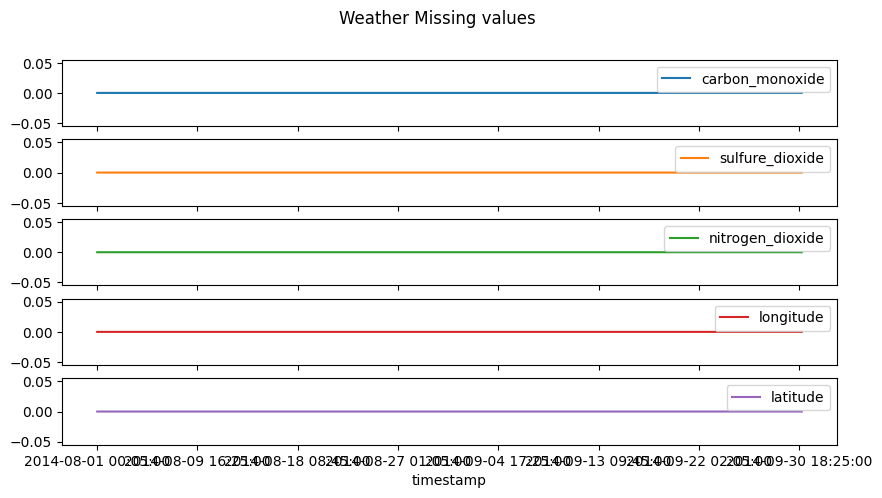

In [51]:
print(pollution_data.isna().sum())
# Visualizing Missing files
missing_data = pollution_data.drop('timestamp', axis = 1).isna().groupby(pollution_data.timestamp, sort = False).sum().reset_index()
missing_data.plot(x='timestamp', 
                title="Weather Missing values",
                y=pollution_data.columns[2:-1], 
                subplots=True,
                figsize=(10,5))

missing_data.describe()

In [63]:
pollution_data.to_csv("../data/aarhus_pollution_data_aug_oct_2014.csv")